In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
#sns.set_style("whitegrid")

pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
#import pandas_datareader.data as data
import datetime
import plotly
from plotly import graph_objs as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
matplotlib.__version__

'3.0.2'

In [3]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [2]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

# Access Tesla stock price from Yahoo

## Method 1: access stock price via DataReader without downloading

In [ ]:
start = datetime.datetime(2010, 1, 1)

end = datetime.datetime(2021, 6, 20)

s=web.DataReader('TSLA', 'yahoo', start, end)
# or s=web.DataReader('TSLA', 'yahoo', '2010-01-01', '2021-06-20')

## Method 2: access stock price data after downloading csv file

In [3]:
s = pd.read_csv('TSLA.csv')
s.set_index('Date', inplace=True)
s.head().round(2)

Open  High   Low  Close  Adj Close    Volume
Date                                                    
2010-06-29  3.80  5.00  3.51   4.78       4.78  93831500
2010-06-30  5.16  6.08  4.66   4.77       4.77  85935500
2010-07-01  5.00  5.18  4.05   4.39       4.39  41094000
2010-07-02  4.60  4.62  3.74   3.84       3.84  25699000
2010-07-06  4.00  4.00  3.17   3.22       3.22  34334500

## plotly.go---Tesla Stock Price

In [4]:
from plotly import graph_objs as go

### Tesla Stock Price With Moving Average

In [5]:
avg_30 = s['Close'].rolling(window=30).mean().round(2)
avg_50 = s['Close'].rolling(window=50).mean().round(2)

In [6]:
trace1 = {
    'x': s.index,
    'open': s.Open,
    'close': s.Close,
    'high': s.High,
    'low': s.Low,
    'type': 'candlestick',
    'name': 'Tesla'
}

trace2 = {
    'x': s.index,
    'y': avg_30,
    'type': 'scatter',
    'mode': 'lines',
    'line': {'width':1, 'color': 'blue'},
    'name': 'Moving average of 30 days'
}

trace3 = {
    'x': s.index,
    'y': avg_50,
    'type': 'scatter',
    'mode': 'lines',
    'line': {'width':1, 'color': 'red'},
    'name': 'Moving average of 50 days'
}

data1 = [trace1, trace2, trace3]

layout1 = go.Layout({
    'title': {'text': 'Tesla Stock Price With Moving Average', 
              'font': {'size': 20}},
    'template': 'plotly_dark'
})

layout2 = go.Layout({
    'title': {'text': 'Tesla Stock Price With Moving Average', 
              'font': {'size': 20}},
    'template': 'plotly'
})


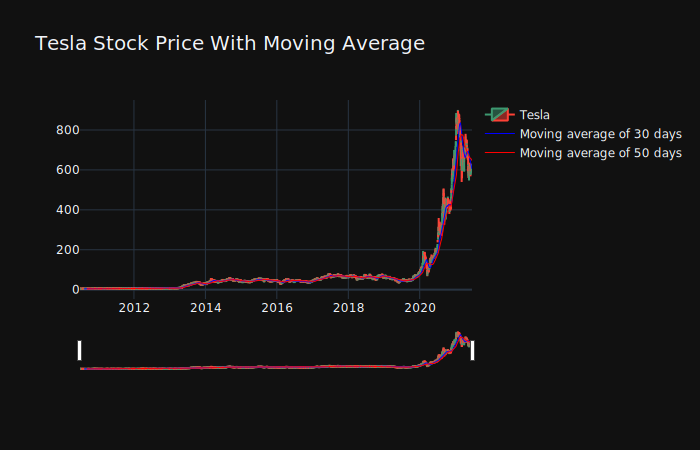

In [7]:
fig1 = go.Figure(data=data1, layout=layout1)
fig1.show("svg") # 'svg' or 'png' transfers interactive graph into static graph in order to display it in github.
#fig1.show() could give interactive graph but it couldn't displayed in Github.

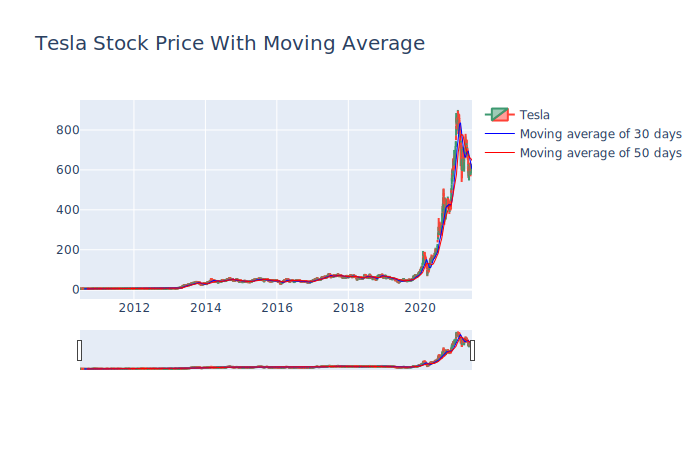

In [8]:
fig2 = go.Figure(data=data1, layout=layout2)
fig2.show('svg') # gives static graph
#fig2.show()   gives interacitve graph

In [26]:
# save plotly graph
fig1.write_html('plotly_tesla_stock.html')

### Tesla Stock Price Without Moving Average

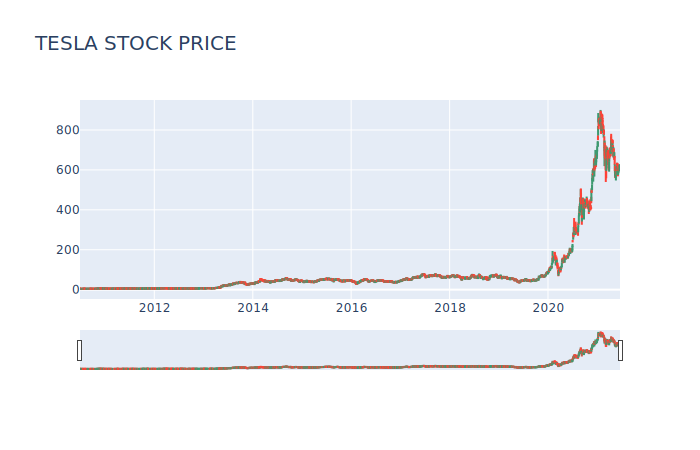

In [10]:
trace1 = {
    'x': s.index,
    'open': s.Open,
    'close': s.Close,
    'low': s.Low,
    'high': s.High,
    'type': 'candlestick',
    'name': 'Tesla',
    'showlegend': False
}

data = [trace1]

layout = go.Layout({
    'title': {'text': 'TESLA STOCK PRICE', 
              'font': {'size': 20}}
})
fig3 = go.Figure(data=data, layout=layout)
fig3.show('svg')
#fig3.show()

## plotly.express

In [11]:
import plotly.express as px

In [12]:
df4 = pd.DataFrame({
    'Close': s.Close.round(2),
    'moving_avg_30': avg_30,
    'moving_avg_50': avg_50
    },
    index = s.index)
df4.tail()

Close  moving_avg_30  moving_avg_50
Date                                            
2021-06-14  617.69         612.71         652.43
2021-06-15  599.36         609.85         650.59
2021-06-16  604.87         607.56         648.86
2021-06-17  616.60         605.75         647.77
2021-06-18  623.31         604.41         646.56

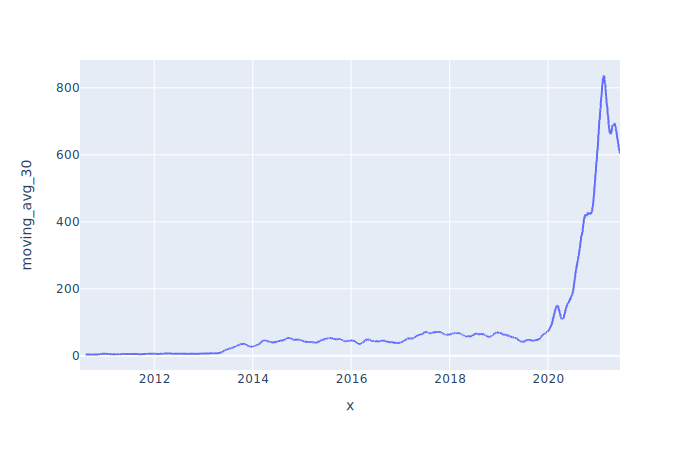

In [13]:
fig4 = px.line(df4, x=df4.index, y='moving_avg_30')
fig4.show('svg')
#fig4.show()

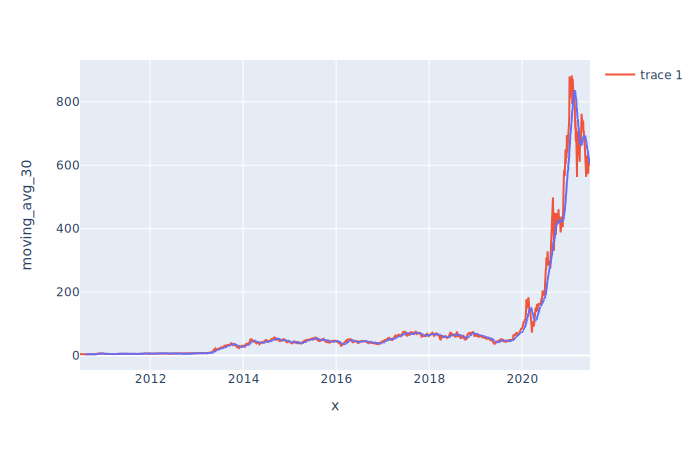

In [14]:
fig5 = fig4.add_scatter(x=df4.index, y=df4['Close'], mode='lines')
fig5.show('svg')
#fig5.show()

## py.iplot_mpl

* py.iplot_mpl is a way to directly convert matplotlib graphs into interactive plotly graphs
* Use plt to plot, then generate interactive graph with py.iplot_mpl

In [15]:
import plotly.offline as py
%matplotlib inline

In [16]:
from matplotlib.pyplot import MultipleLocator
fig=plt.figure(figsize=(15,6))
x=s.index
plt.plot(x, s.Close, color='green', label="Close")
plt.plot(x, avg_30, color='red', label="moving_avg_30")
plt.plot(x, avg_50, color='blue', label="moving_avg_50")
plt.legend()
plt.xlabel('date')
plt.ylabel('price')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(252))
#is used to set the locator of the major ticker.
plt.xticks(rotation=30)
py.iplot_mpl(fig, image_filename='random1')
fig.show('svg')
#fig.show()

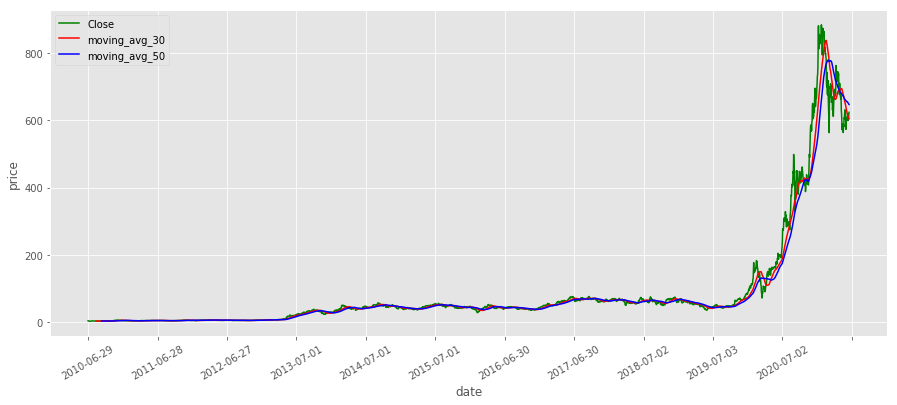

'temp-plot.html'

In [17]:
from matplotlib.pyplot import MultipleLocator
fig=plt.figure(figsize=(15,6))
x=s.index
plt.plot(x, s.Close, color='green', label="Close")
plt.plot(x, avg_30, color='red', label="moving_avg_30")
plt.plot(x, avg_50, color='blue', label="moving_avg_50")
plt.legend()
plt.xlabel('date')
plt.ylabel('price')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(252))
#is used to set the locator of the major ticker.
plt.xticks(rotation=30)
plt.show()
py.plot_mpl(fig, image_filename='random')

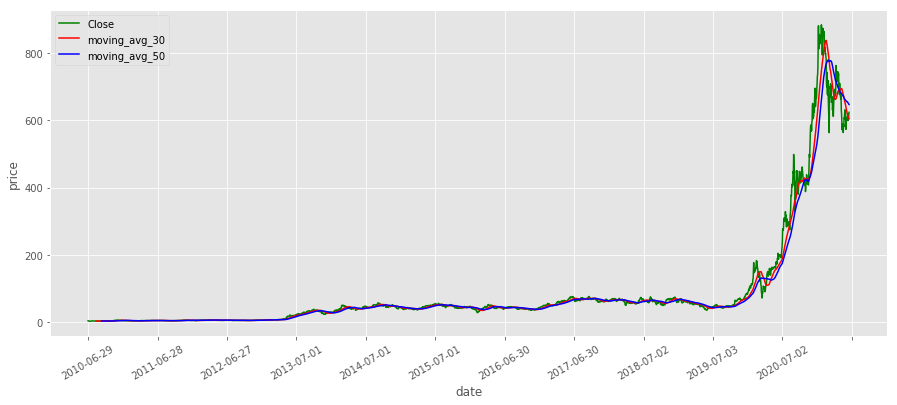

In [18]:
from matplotlib.pyplot import MultipleLocator
fig=plt.figure(figsize=(15,6))
x=s.index
plt.plot(x, s.Close, color='green', label="Close")
plt.plot(x, avg_30, color='red', label="moving_avg_30")
plt.plot(x, avg_50, color='blue', label="moving_avg_50")
plt.legend()
plt.xlabel('date')
plt.ylabel('price')
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(252))
#is used to set the locator of the major ticker.
plt.xticks(rotation=30)
plt.show()

## matplotlib

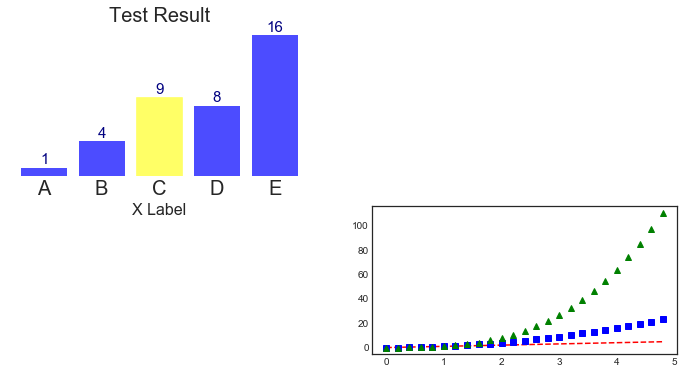

In [19]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(2,2,1) # cut the figure into two rows two columns, and take the upper left one.
rects = ax.bar([1,2,3,4,5], [1,4,9,8,16], color='blue', alpha=0.7)#patches.Rectangle
tmp = rects[2]
tmp.set_color('yellow')
tmp.set_alpha(0.6)
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(False)
# remove the frame
for x, y in ax.spines.items():
    y.set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax.set_xticks([1,2,3,4,5]) # original plot xticks is 0,1,2,3,4,5,6
ax.set_xticklabels(list('ABCDE'), fontsize=20) # or fontdict={'fontsize': 20}
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x()+rect.get_width()/2, int(height)+0.05, 
            '%d' %height, fontsize=15, color='navy', ha='center', va='bottom')
    ax.set_ylabel('Y Label', fontsize=20)
    ax.set_xlabel('X Label', fontsize=16)
    ax.set_title('Test Result', fontsize=20)
t = np.arange(0, 5, 0.2)
ax3 = fig.add_subplot(2,2,4)
ax3.plot(t, t, 'r--')
ax3.plot(t, t**2, 'bs')
ax3.plot(t, t**3, 'g^')
fig.show()

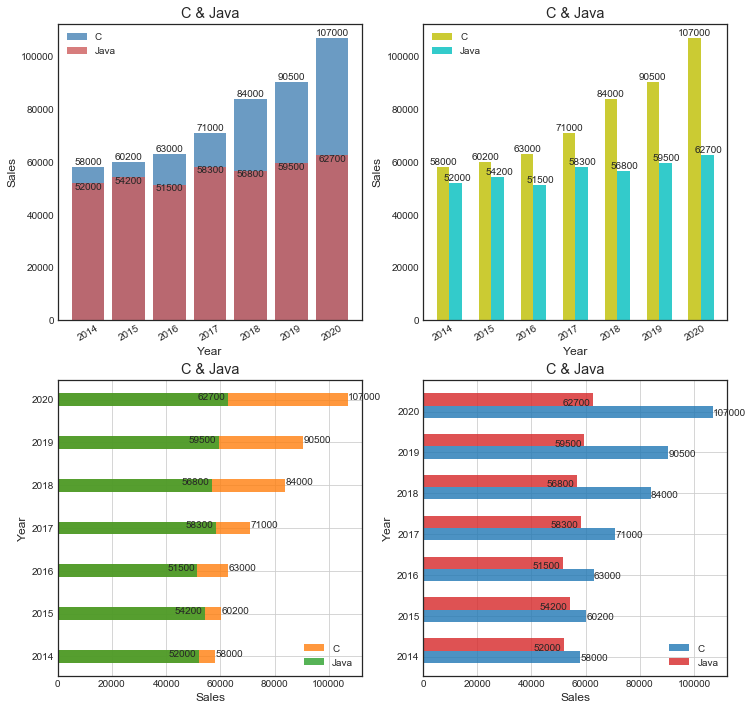

In [20]:
x_data = ['2014','2015','2016','2017','2018','2019','2020']
y_data = [58000, 60200, 63000, 71000, 84000, 90500, 107000]
y_data2 = [52000, 54200, 51500, 58300, 56800, 59500, 62700]
fig = plt.figure(figsize=[12,12])
# the first plot
plt.subplot(2,2,1)
plt.bar(x=x_data, height=y_data, label='C', color='steelblue', alpha=0.8)
plt.bar(x=x_data, height=y_data2, label='Java', color='indianred', alpha=0.8)
for x,y in enumerate(y_data):
    plt.text(x, y+100, "%d" %y, ha='center', va='bottom')
for x,y in enumerate(y_data2):
    plt.text(x, y+200, "%d" %y, ha='center', va='top')
plt.title('C & Java')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=30)
plt.legend(loc='upper left')

# the second plot
plt.subplot(2,2,2)
bar_width=0.3
plt.bar(x=range(len(x_data)), height=y_data, label='C', color='y', alpha=0.8, width=bar_width)
plt.bar(x=np.arange(len(x_data))+bar_width, height=y_data2, label='Java', color='c', alpha=0.8, width=bar_width)
for x,y in enumerate(y_data):
    plt.text(x, y+100, "%d" %y, ha='center', va='bottom')
for x,y in enumerate(y_data2):
    plt.text(x, y+100, "%d" %y, ha='left', va='bottom')
plt.title('C & Java')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(np.arange(7), x_data, rotation=30)
plt.legend(loc='upper left')

# the third plot
plt.subplot(2,2,3)
plt.grid()
bar_width=0.3
plt.barh(y=x_data, width=y_data,label='C', color='tab:orange', alpha=0.8, height=bar_width)
plt.barh(y=x_data, width=y_data2,label='Java', color='tab:green', alpha=0.8, height=bar_width)
for x, y in enumerate(y_data):
    plt.text(y+100, x, "%d" %y)
for x, y in enumerate(y_data2):
    plt.text(y-6000, x, "%d" %y, ha='center')
plt.title('C & Java')
plt.ylabel('Year')
plt.xlabel('Sales')
plt.yticks()
plt.legend(loc='lower right')

# the fourth plot
plt.subplot(2,2,4)
plt.grid()
bar_width=0.3
plt.barh(y=np.arange(len(x_data)), width=y_data,label='C', color='tab:blue', alpha=0.8, height=bar_width)
plt.barh(y=np.arange(len(x_data))+bar_width, width=y_data2,label='Java', color='tab:red', alpha=0.8, height=bar_width)
for x, y in enumerate(y_data):
    plt.text(y+100, x-(bar_width)/3, "%d" %y)
for x, y in enumerate(y_data2):
    plt.text(y-6000, x+(bar_width)/2, "%d" %y, ha='center')
plt.title('C & Java')
plt.ylabel('Year')
plt.xlabel('Sales')
plt.yticks(np.arange(7), x_data)
plt.legend(loc='lower right')


* %matplotlib inline: lead to static plots embeded in notbook
* %matplotlib notebook: lead to interactive plot embeded in notebook

<IPython.core.display.Javascript object>


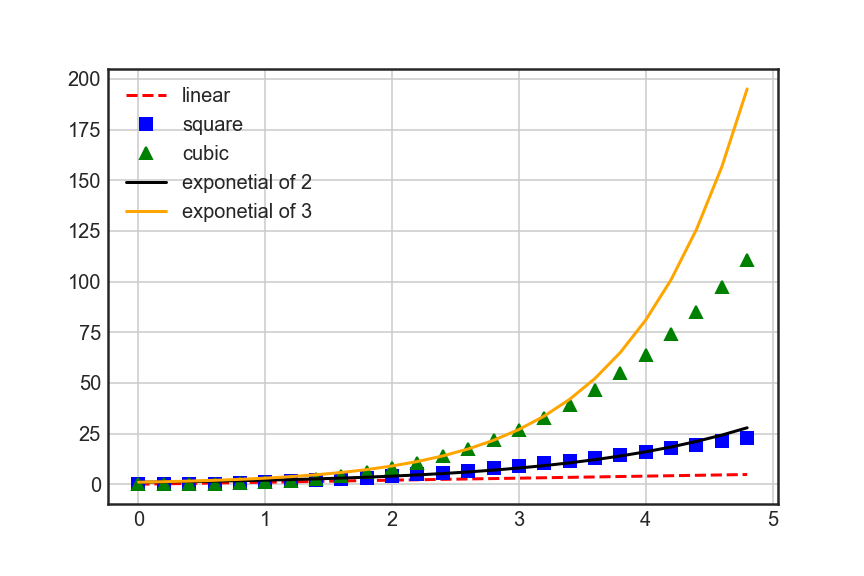

In [23]:
%matplotlib notebook

plt.style.use('seaborn-white')
plt.grid()
plt.plot(t, t, 'r--', label='linear')
plt.plot(t, t**2, 'bs', label='square')
plt.plot(t, t**3, 'g^', label='cubic')
plt.plot(t, 2**t, 'black', label='exponetial of 2')
plt.plot(t, 3**t, 'orange', label='exponetial of 3')
plt.legend()
plt.show()
